In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


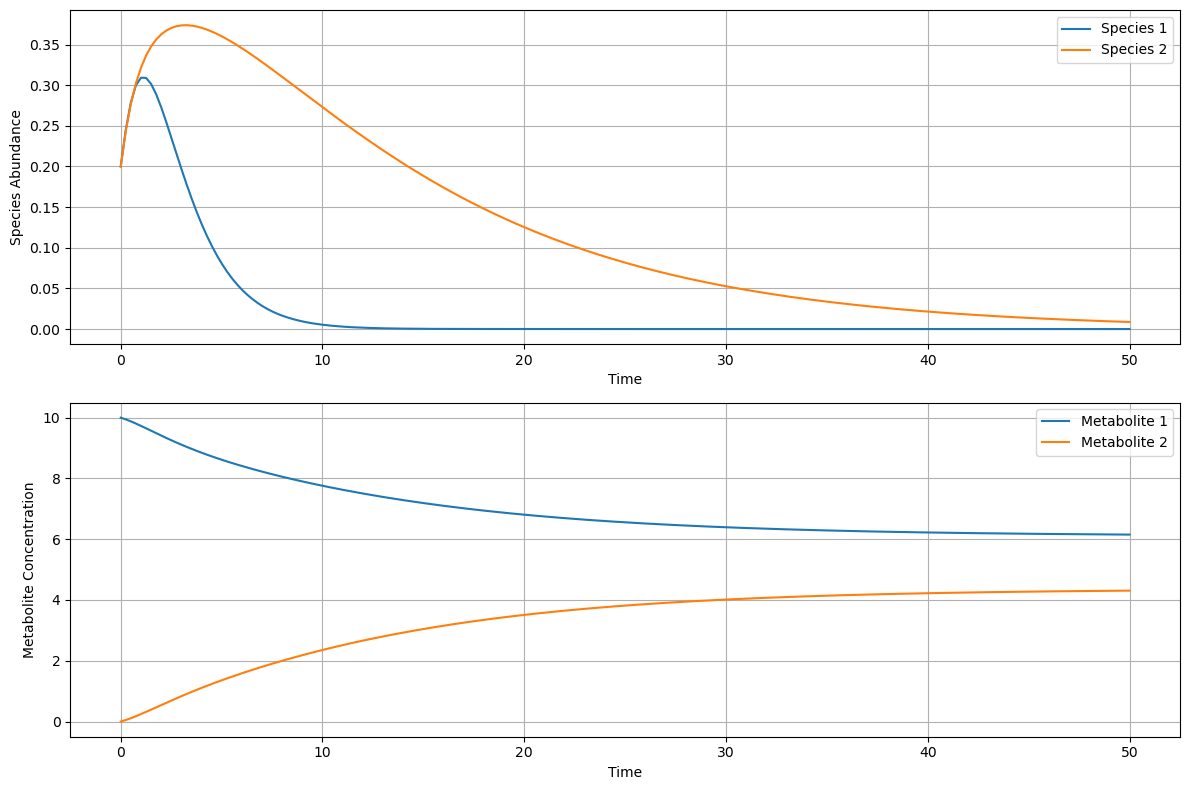

In [63]:

def consumer_resource_model(t, y, n, m, r0, rho, alpha, beta, K, D, M0):

    S = y[:n]
    M = y[n:]
    
    dSdt = np.zeros(n)
    dMdt = np.zeros(m)
    
    for i in range(n):
        growth_term = r0[i]
        
        for j in range(m):
            growth_term += rho[i,j] * M[j] / (K[i,j] + M[j])
        
        dSdt[i] = growth_term * S[i] - D * S[i]*0
    
    for j in range(m):
        metabolism_term = 0
        
        for i in range(n):
            production = beta[j,i] * S[i]
            
            consumption = alpha[j,i] * M[j] / (M[j] + K[i,j]) * S[i]
            
            metabolism_term += production - consumption
        
        dMdt[j] = metabolism_term + D * (M0[j] - M[j])*0
    
    return np.concatenate([dSdt, dMdt])

n = 2     
m = 2  
    
r0 = np.array([0, 0])
    
rho = np.array([
        [1, -1.7],   # S1 heterolactique
        [1, -1.1]    # S2 homolactique
    ])
    
    
alpha = np.array([
        [0.5, 0.5],    # 
        [0, 0]    
    ])
    
beta = np.array([
        [0, 0],   
        [0.3, 0.6]    
    ])
    
K = np.array([
        [0.1, 0.2],   
        [0.1, 0.1]   
    ])
    
D = 0.1                   
M0 = np.array([1.0, 0.5]) # sucre et acide lactique
    
y0 = np.array([0.2, 0.2, 10, 0])
    
t_span = (0, 50)
t_eval = np.linspace(0, 50, 200)
    
solution = solve_ivp(
        lambda t, y: consumer_resource_model(t, y, n, m, r0, rho, alpha, beta, K, D, M0),
        t_span,
        y0,
        method='RK45',
        t_eval=t_eval
    )
    
plt.figure(figsize=(12, 8))
    
plt.subplot(2, 1, 1)
for i in range(n):
    plt.plot(solution.t, solution.y[i], label=f'Species {i+1}')
plt.xlabel('Time')
plt.ylabel('Species Abundance')
plt.legend()
plt.grid(True)
    
plt.subplot(2, 1, 2)
for j in range(m):
    plt.plot(solution.t, solution.y[n_species + j], label=f'Metabolite {j+1}')
plt.xlabel('Time')
plt.ylabel('Metabolite Concentration')
plt.legend()
plt.grid(True)
    
plt.tight_layout()
plt.show()
